In [2]:
import csv
from collections import defaultdict
from pathlib import Path
import arrow
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

In [10]:
tweet_files = Path("/Users/nowke/projects/cse-573-project/Datasets/Twitter Data/AMZN").glob("*.csv")
bucket = defaultdict(lambda: 0)

for tweet_file in sorted(tweet_files):
    with open(tweet_file, 'r') as csvfile:
        reader = csv.DictReader(
            csvfile, 
            fieldnames=['time', 'id', 'text', 'url', 'user_id', 'user_name']
        )
        for row in reader:
            key = arrow.get(row['time']).replace(minute=0, second=0).format()
            bucket[key] += 1

In [11]:
datetimes = sorted(bucket.keys())
counts = [bucket[x] for x in datetimes]
datetimes = [arrow.get(x).datetime for x in datetimes]
columns = ["datetime", "count"]

data_df = pd.DataFrame({"datetime": datetimes, "count": counts})
data_df

,datetime,count
0,2021-04-02 00:00:00+00:00,39
1,2021-04-02 01:00:00+00:00,47
2,2021-04-02 02:00:00+00:00,37
3,2021-04-02 03:00:00+00:00,41
4,2021-04-02 04:00:00+00:00,39
...,...,...
139,2021-04-07 19:00:00+00:00,129
140,2021-04-07 20:00:00+00:00,113
141,2021-04-07 21:00:00+00:00,91
142,2021-04-07 22:00:00+00:00,66


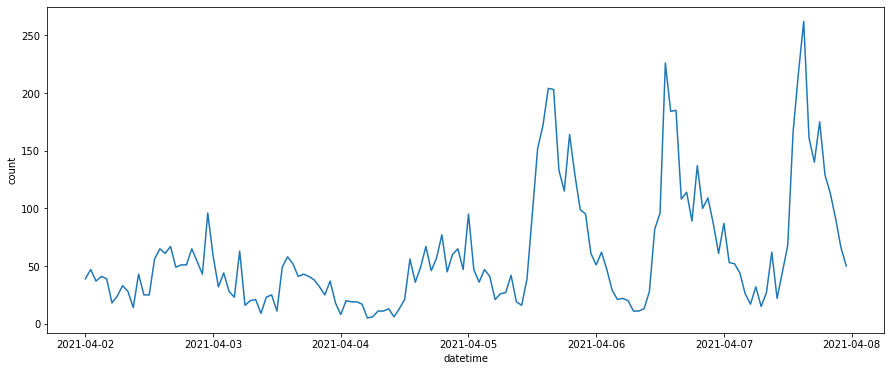

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=data_df, x="datetime", y="count", ax=ax)
plt.show()

## Breakout hours detection

In [13]:
datetimes = sorted(bucket.keys())
counts = [bucket[x] for x in datetimes]
WINDOW = 20

for i, time in enumerate(datetimes):
    if i >= WINDOW:
        mean = stat.mean(counts[i-WINDOW:i])
        std  = stat.stdev(counts[i-WINDOW:i])
        current_vol = counts[i]
        if current_vol > (mean + 2*std):
            print(time)
        #print("Cur", current_vol, "Mean", mean, "Std", std)

2021-04-02 23:00:00+00:00
2021-04-04 13:00:00+00:00
2021-04-04 15:00:00+00:00
2021-04-04 16:00:00+00:00
2021-04-04 19:00:00+00:00
2021-04-05 00:00:00+00:00
2021-04-05 12:00:00+00:00
2021-04-05 13:00:00+00:00
2021-04-05 14:00:00+00:00
2021-04-05 15:00:00+00:00
2021-04-05 16:00:00+00:00
2021-04-06 13:00:00+00:00
2021-04-07 13:00:00+00:00
2021-04-07 14:00:00+00:00
2021-04-07 15:00:00+00:00
